## <center>Walmart Sales Data Analysis

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./walmart-sales-dataset-of-45stores.csv',parse_dates=['Date'])
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [4]:
data.size

51480

In [5]:
data.shape

(6435, 8)

In [6]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
data.Holiday_Flag.unique()

array([0, 1], dtype=int64)

In [8]:
data.isnull().mean()*100

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [10]:
data.duplicated().sum()

0

In [11]:
data['Year']=data.Date.dt.year
data['Month']=data.Date.dt.month
data['Day']=data.Date.dt.day
data.sample()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
873,7,2010-05-21,395195.65,0,46.6,2.776,189.467827,8.963,2010,5,21


In [12]:
data.Month.unique()

array([ 5, 12,  2,  3,  9,  4,  7, 11,  6,  8, 10,  1], dtype=int64)

In [13]:
data['Months']=data.Month.replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Months
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,may
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,dec
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,feb
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,feb
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,may


In [14]:
data_Month=data.sort_values(by='Months')
data_Month.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Months
1664,12,2011-04-11,1051944.79,0,59.77,3.828,129.805194,12.890,2011,4,11,apr
3977,28,2012-04-27,1170456.16,0,77.99,4.193,131.126667,11.627,2012,4,27,apr
3976,28,2012-04-20,1180797.20,0,66.73,4.222,131.117333,11.627,2012,4,20,apr
3975,28,2012-04-13,1290684.95,0,64.28,4.254,131.108000,11.627,2012,4,13,apr
1440,11,2010-04-16,1323243.35,0,67.81,2.808,213.772689,7.343,2010,4,16,apr


In [15]:
data['Week_day']=data.Date.dt.day_of_week
data.sample()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Months,Week_day
693,5,2012-01-06,359867.8,0,79.72,3.501,222.334328,5.801,2012,1,6,jan,4


In [16]:
data.Week_day.unique()

array([6, 3, 4, 0, 5, 1, 2], dtype=int64)

In [17]:
data['Weekday_Name']=data.Week_day.replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Months,Week_day,Weekday_Name
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,may,6,sat
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,dec,3,wed
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,feb,4,thu
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,feb,4,thu
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,may,0,sun


### EDA Using Graphs 

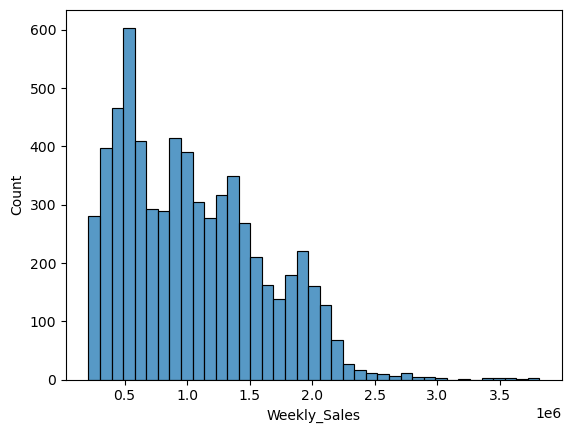

In [18]:
sns.histplot(data=data,x='Weekly_Sales')
plt.show()

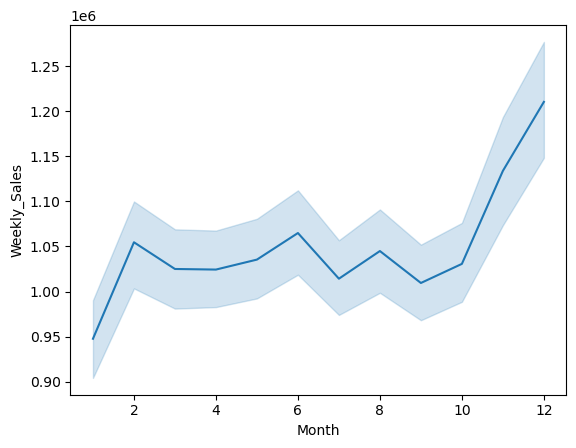

In [19]:
sns.lineplot(data=data,x='Month',y='Weekly_Sales')
plt.show()

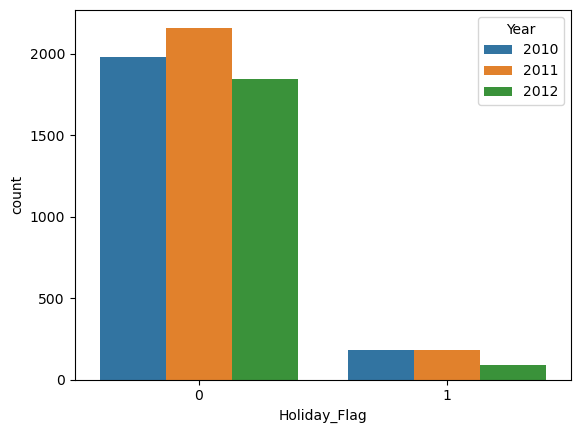

In [20]:
sns.countplot(data=data,x='Holiday_Flag',hue='Year')
plt.show()

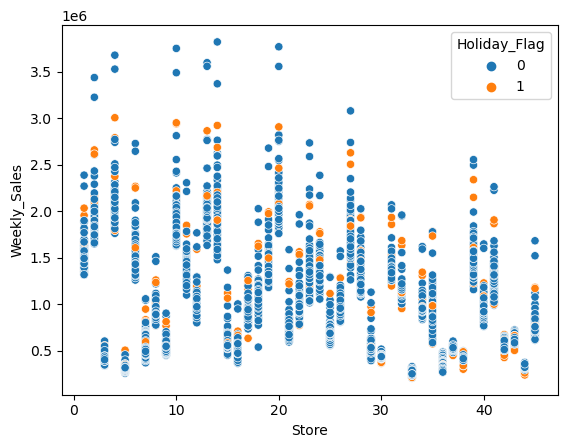

In [21]:
sns.scatterplot(data=data,x='Store',y='Weekly_Sales',hue='Holiday_Flag')
plt.show()

In [22]:
Weekday_Name_Weekly_Sales=data.groupby(['Weekday_Name'])['Weekly_Sales'].sum()
Weekday_Name_Weekly_Sales

Weekday_Name
fri    2.824947e+08
mon    4.335075e+08
sat    4.266091e+08
sun    5.390133e+08
thu    4.486257e+09
tue    9.271282e+07
wed    4.766244e+08
Name: Weekly_Sales, dtype: float64

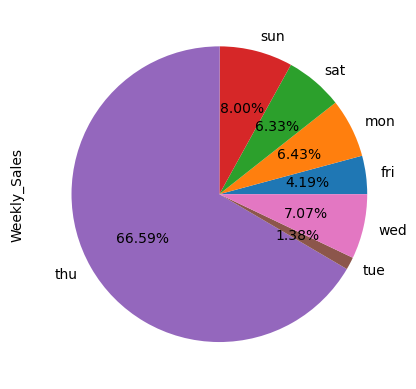

In [23]:
Weekday_Name_Weekly_Sales.plot.pie(autopct='%1.2f%%')
plt.show()

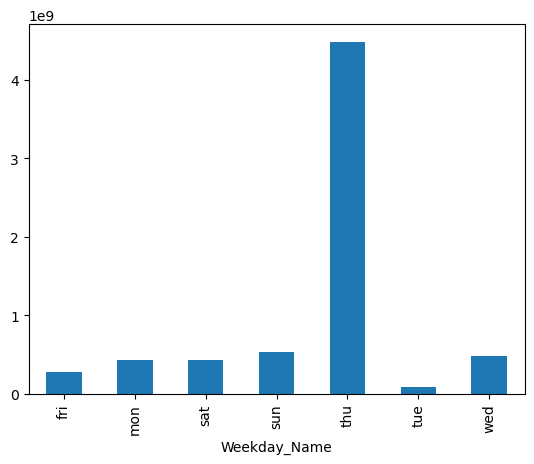

In [24]:
Weekday_Name_Weekly_Sales.plot.bar()
plt.show()

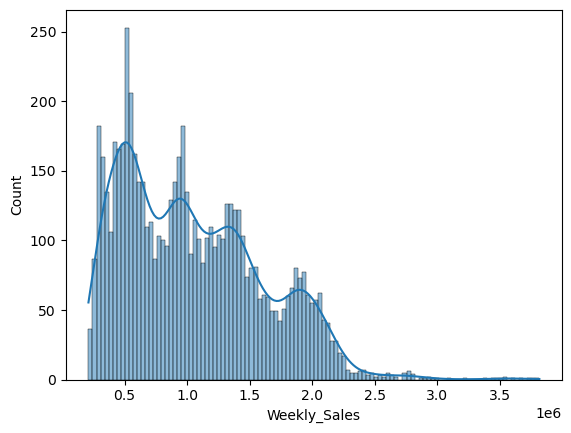

In [25]:
sns.histplot(data=data,kde=True,x='Weekly_Sales',bins=112)
plt.show()

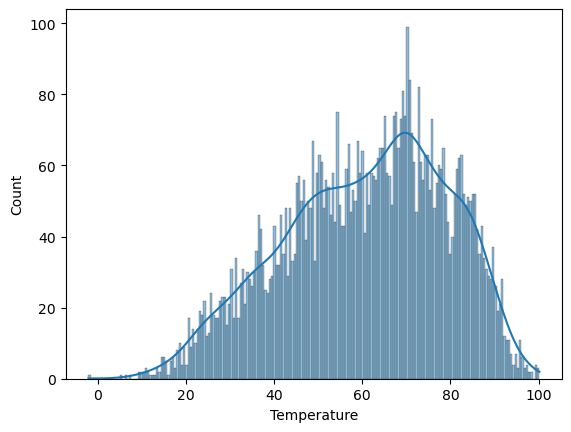

In [26]:
sns.histplot(data=data,kde=True,x='Temperature',bins=200)
plt.show()

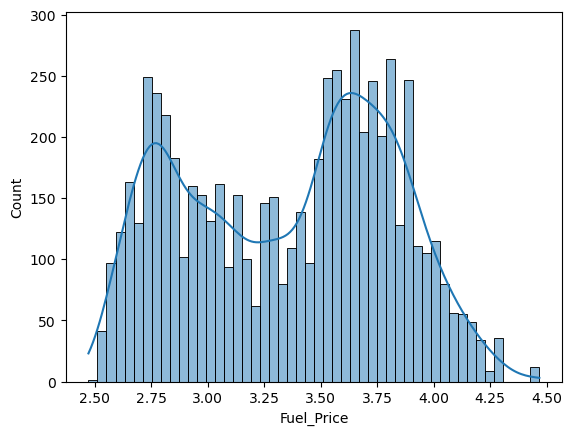

In [27]:
sns.histplot(data=data,kde=True,x='Fuel_Price',bins=50)
plt.show()

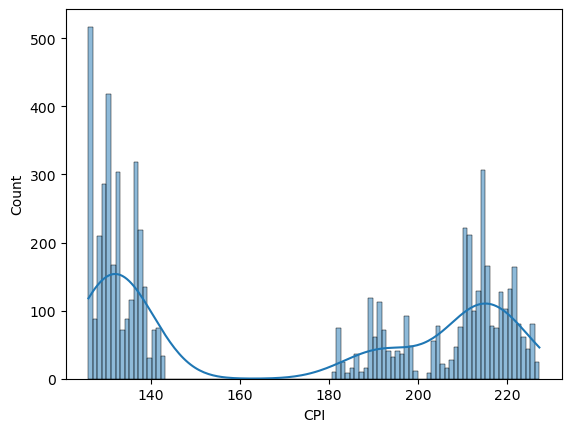

In [28]:
sns.histplot(data=data,kde=True,x='CPI',bins=100)
plt.show()

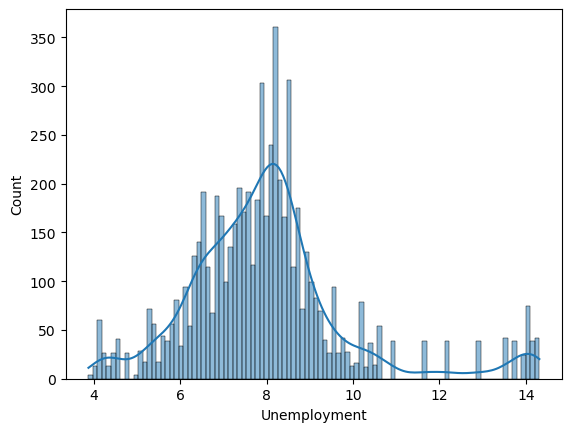

In [29]:
sns.histplot(data=data,kde=True,x='Unemployment',bins=100)
plt.show()

### Box plot

In [30]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Months',
       'Week_day', 'Weekday_Name'],
      dtype='object')

In [31]:
Columns_List=['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']        

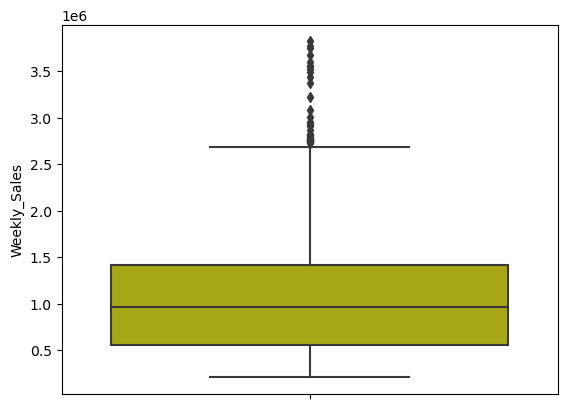

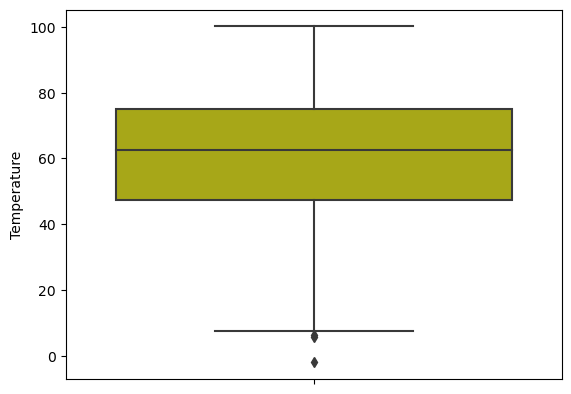

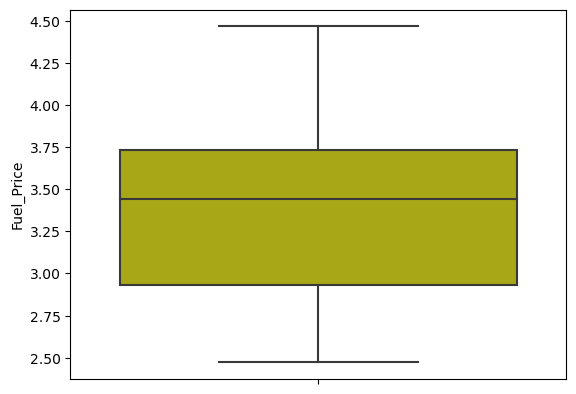

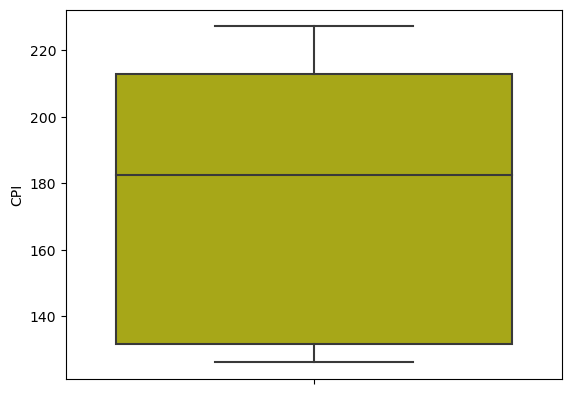

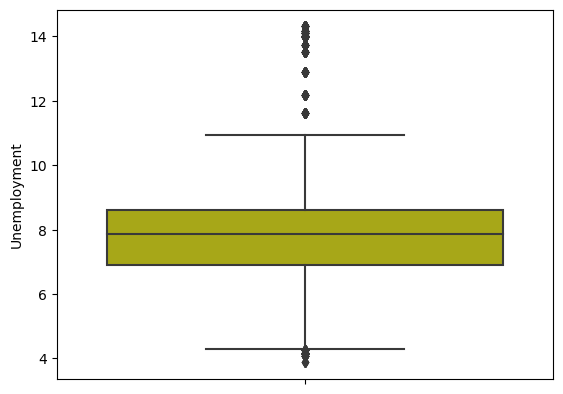

In [32]:
for i in Columns_List:
    sns.boxplot(y=data[i],data=data,color='y')
    plt.show()

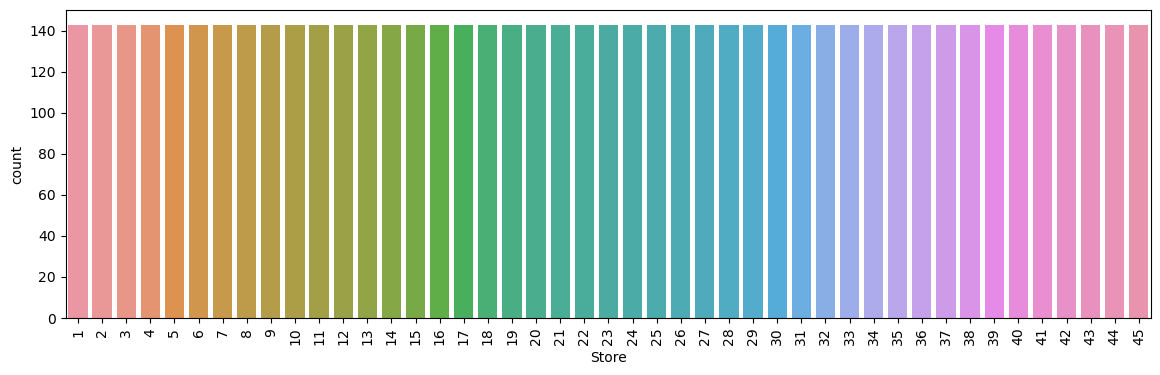

In [33]:
plt.figure(figsize=(14,4))
sns.countplot(x='Store',data=data)
plt.xticks(rotation=90)
plt.show()

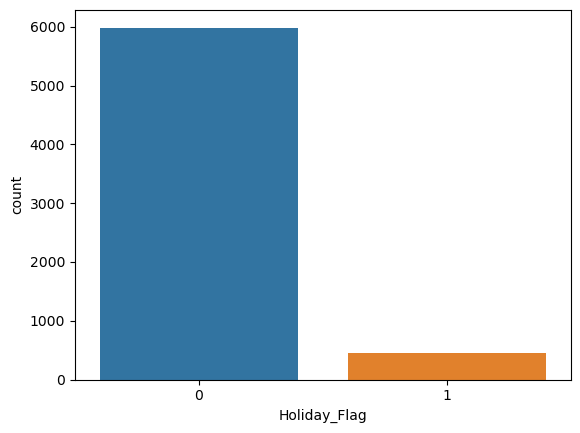

In [34]:
sns.countplot(x='Holiday_Flag',data=data)
plt.show()

### Line Chart

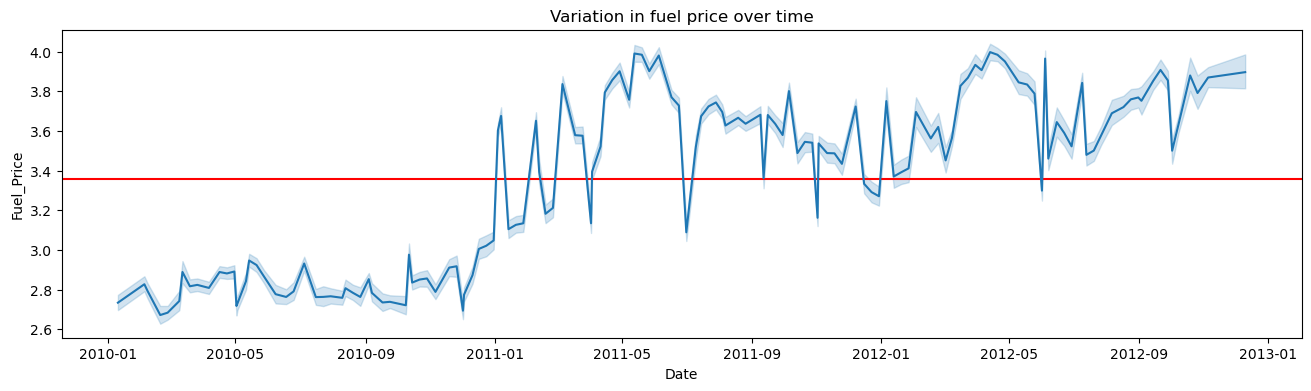

In [35]:
plt.figure(figsize=(16,4))
plt.axhline(y=data.Fuel_Price.mean(),color='r')
sns.lineplot(x='Date',y='Fuel_Price',data=data)
plt.title('Variation in fuel price over time')
plt.show()

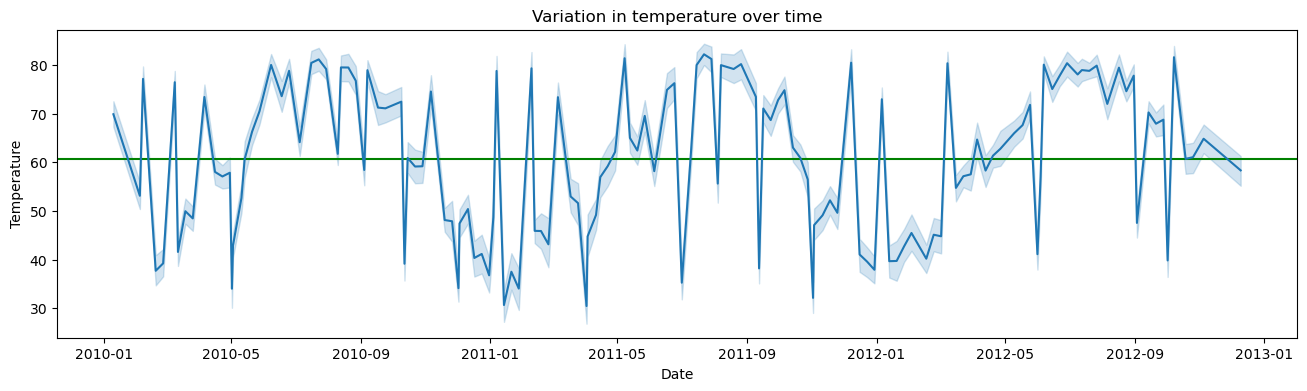

In [36]:
plt.figure(figsize=(16,4))
plt.axhline(y=data.Temperature.mean(),color='g')
sns.lineplot(x='Date',y='Temperature',data=data)
plt.title('Variation in temperature over time')
plt.show()

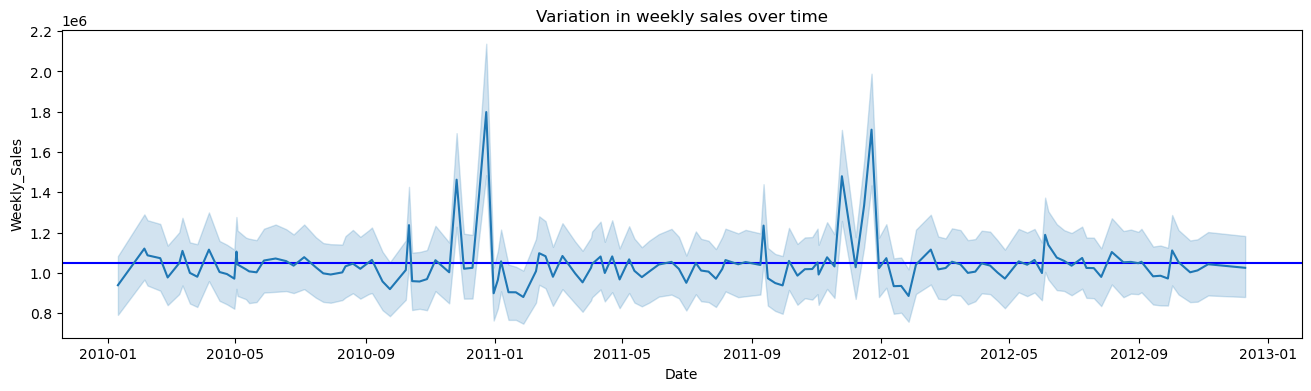

In [37]:
plt.figure(figsize=(16,4))
plt.axhline(y=data.Weekly_Sales.mean(),color='b')
sns.lineplot(x='Date',y='Weekly_Sales',data=data)
plt.title('Variation in weekly sales over time')
plt.show()

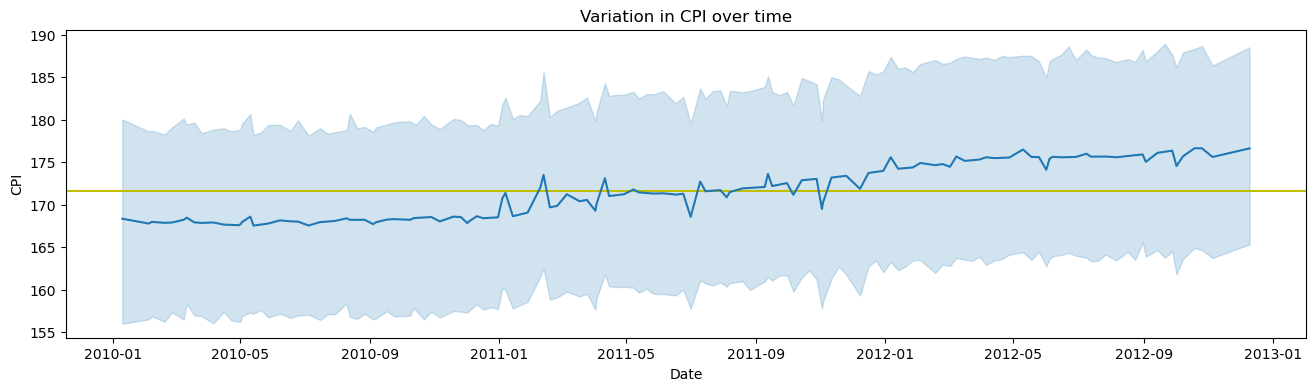

In [38]:
plt.figure(figsize=(16,4))
plt.axhline(y=data.CPI.mean(),color='y')
sns.lineplot(x='Date',y='CPI',data=data)
plt.title('Variation in CPI over time')
plt.show()

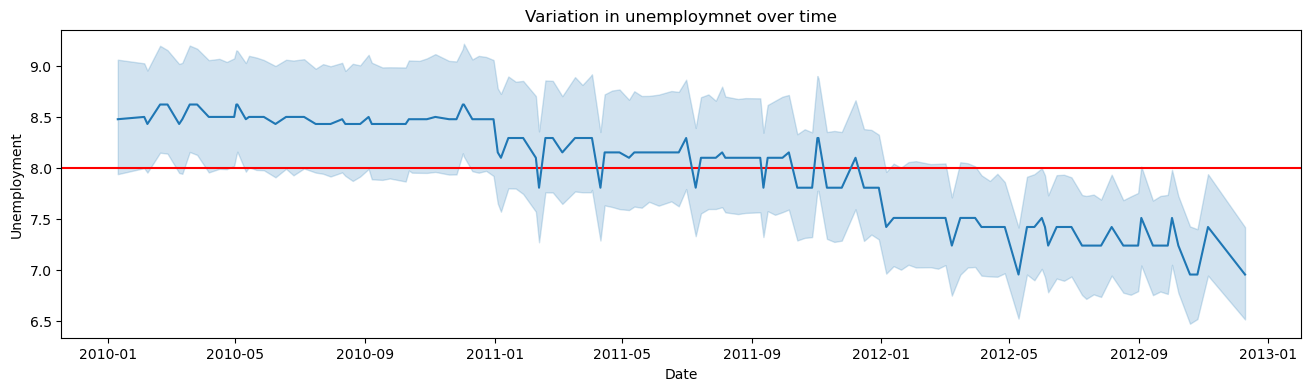

In [39]:
plt.figure(figsize=(16,4))
plt.axhline(y=data.Unemployment.mean(),color='r')
sns.lineplot(x='Date',y='Unemployment',data=data)
plt.title('Variation in unemploymnet over time')
plt.show()

### Scatter plot

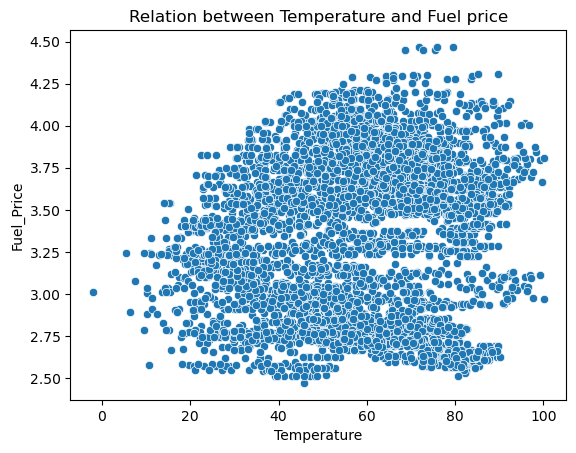

In [40]:
sns.scatterplot(x='Temperature',y='Fuel_Price',data=data)
plt.title('Relation between Temperature and Fuel price')
plt.show()

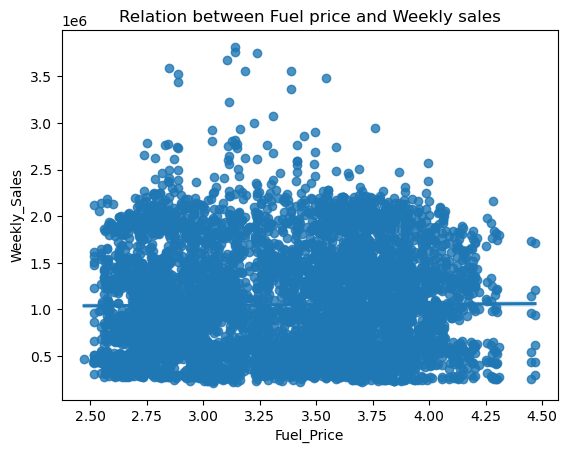

In [41]:
sns.regplot(x='Fuel_Price',y='Weekly_Sales',data=data)
plt.title('Relation between Fuel price and Weekly sales')
plt.show()

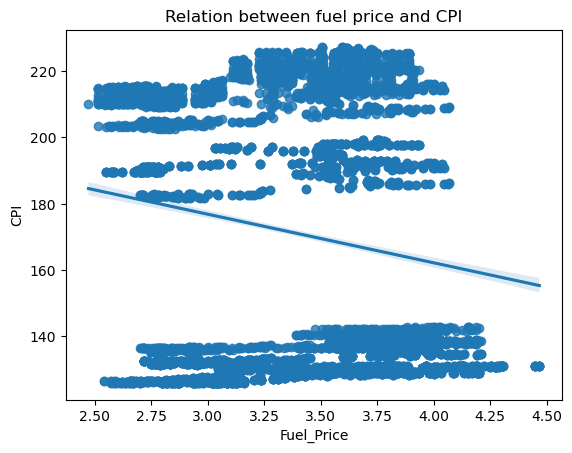

In [42]:
sns.regplot(x='Fuel_Price',y='CPI',data=data)
plt.title('Relation between fuel price and CPI')
plt.show()

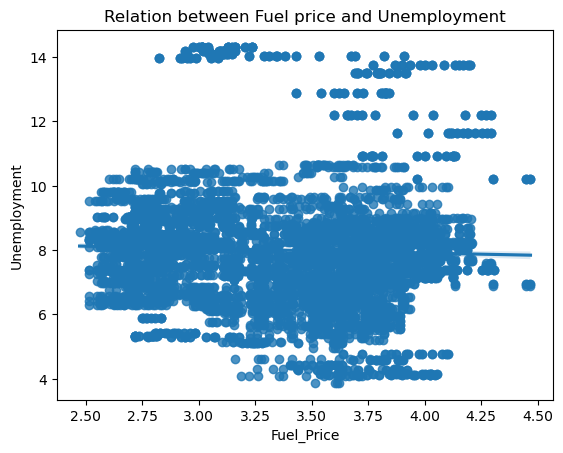

In [43]:
sns.regplot(x='Fuel_Price',y='Unemployment',data=data)
plt.title('Relation between Fuel price and Unemployment')
plt.show()

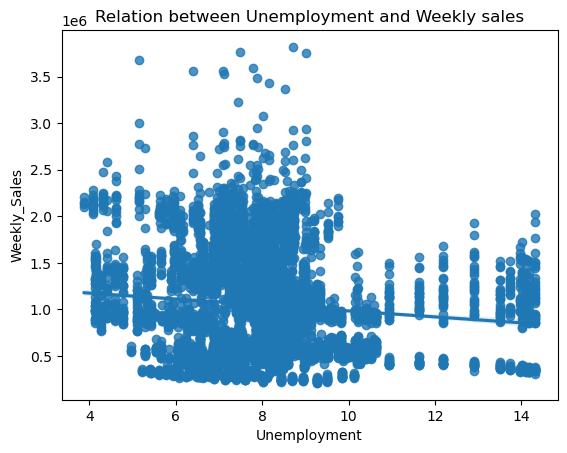

In [44]:
sns.regplot(x='Unemployment',y='Weekly_Sales',data=data)
plt.title('Relation between Unemployment and Weekly sales')
plt.show()

### Pie chart

In [45]:
Holiday_Sales=data.groupby(['Holiday_Flag'])['Weekly_Sales'].mean()

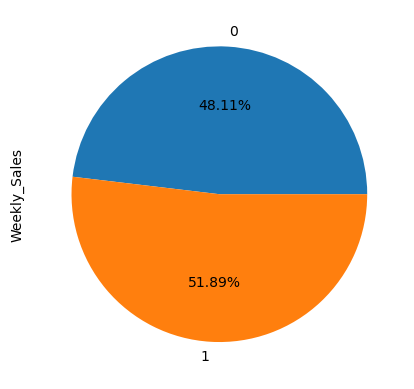

In [46]:
Holiday_Sales.plot.pie(autopct='%1.2f%%')
plt.show()

### Bar plot

In [47]:
Store_Sales=data.groupby(['Store'])['Weekly_Sales'].sum()

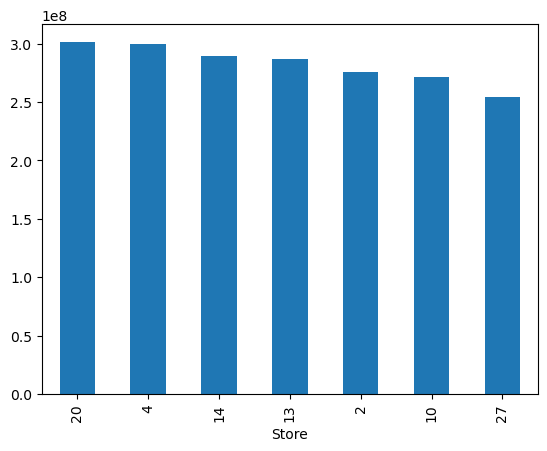

In [48]:
Store_Sales.nlargest(7).plot.bar()
plt.show()

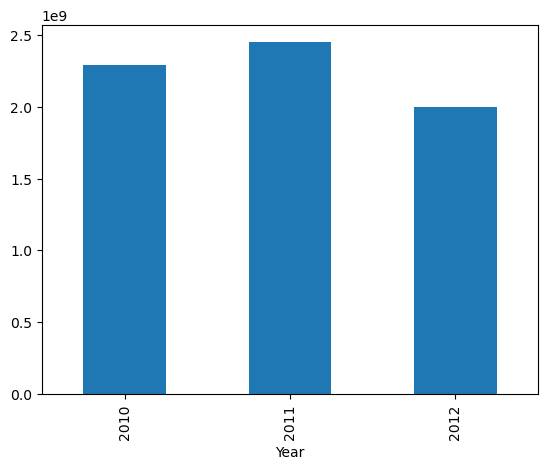

In [49]:
Year_Sales=data.groupby(['Year'])['Weekly_Sales'].sum()
Year_Sales.plot.bar();

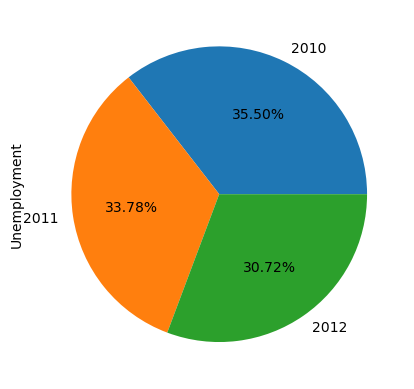

In [50]:
Year_Unemployment=data.groupby(['Year'])['Unemployment'].mean()
Year_Unemployment.plot.pie(autopct='%1.2f%%');


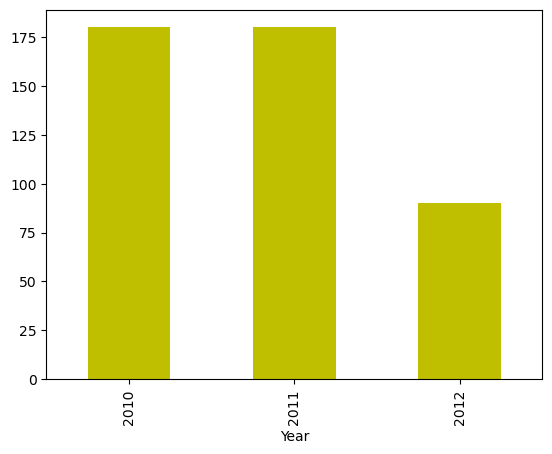

In [51]:
Year_Holiday=data.groupby(['Year'])['Holiday_Flag'].sum()
Year_Holiday.plot.bar(color='y');

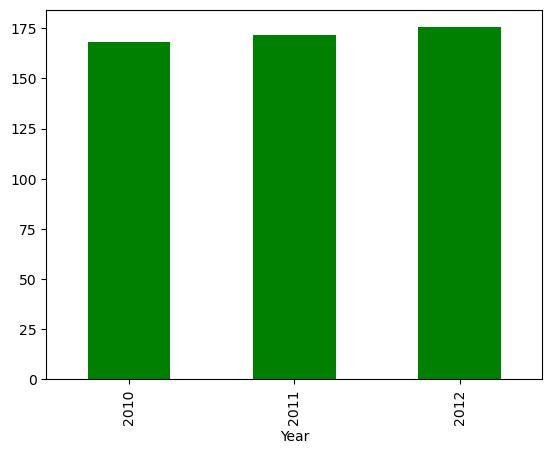

In [52]:
Year_CPI=data.groupby(['Year'])['CPI'].mean()
Year_CPI.plot.bar(color='g');

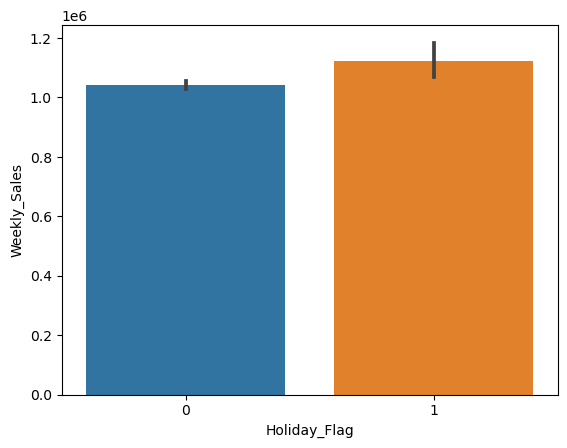

In [53]:
sns.barplot(x='Holiday_Flag',y='Weekly_Sales',data=data);

### Year wise plots

In [54]:
Year_2010=data[data.Year==2010]
Year_2011=data[data.Year==2011]
Year_2012=data[data.Year==2012]

In [55]:
Year_2010.drop(columns='Year',inplace=True)
Year_2011.drop(columns='Year',inplace=True)
Year_2012.drop(columns='Year',inplace=True)

In [56]:
Year_2010=data[data.Year==2010]
Year_2010

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Months,Week_day,Weekday_Name
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,may,6,sat
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,dec,3,wed
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,feb,4,thu
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,feb,4,thu
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,may,0,sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,45,2010-03-12,879244.90,0,40.93,3.046,182.667615,8.724,2010,3,12,mar,4,thu
6336,45,2010-10-12,1002364.34,0,30.54,3.109,182.551954,8.724,2010,10,12,oct,1,mon
6337,45,2010-12-17,1123282.85,0,30.51,3.140,182.517732,8.724,2010,12,17,dec,4,thu
6338,45,2010-12-24,1682862.03,0,30.59,3.141,182.544590,8.724,2010,12,24,dec,4,thu


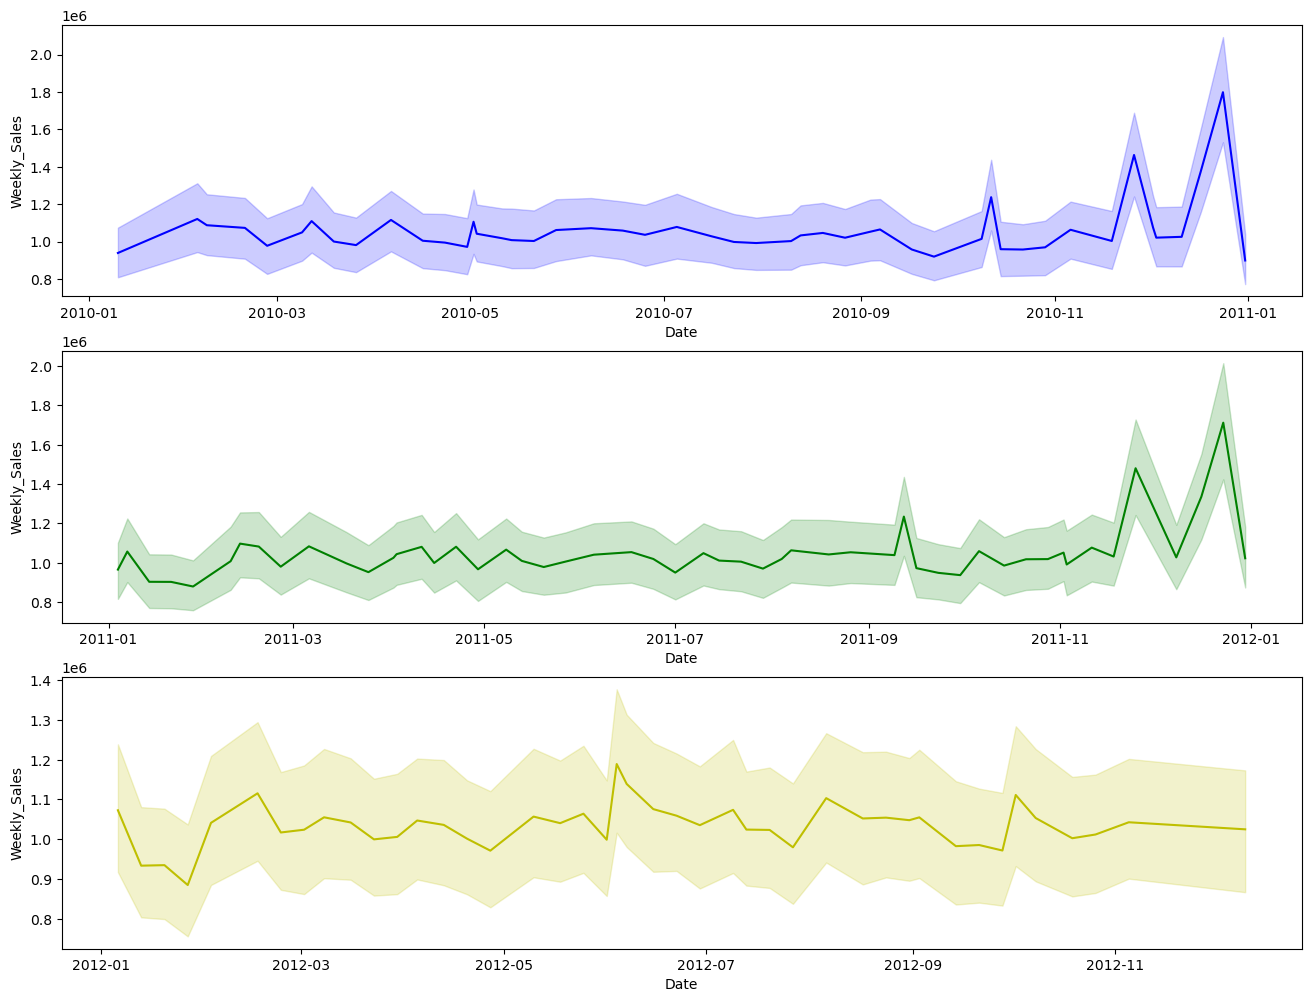

In [57]:
plt.figure(figsize=(16,12))
plt.subplot(3,1,1)
sns.lineplot(x='Date',y='Weekly_Sales',data=Year_2010,color='b')

plt.subplot(3,1,2)
sns.lineplot(x='Date',y='Weekly_Sales',data=Year_2011,color='g')

plt.subplot(3,1,3)
sns.lineplot(x='Date',y='Weekly_Sales',data=Year_2012,color='y')

plt.show()


#### Yearly Sales from each stores

In [58]:
Yearly_Sales_Store=data.groupby(['Store','Year'])['Weekly_Sales'].sum()

In [59]:
Yearly_Sales_Store=Yearly_Sales_Store.reset_index()

In [60]:
Yearly_Sales_Store

,Store,Year,Weekly_Sales
0,1,2010,73278832.00
1,1,2011,80921918.83
2,1,2012,68202058.02
3,2,2010,95277864.19
4,2,2011,98607881.42
...,...,...,...
130,44,2011,15498194.67
131,44,2012,14187373.72
132,45,2010,38536343.37
133,45,2011,41135367.88


In [61]:
Yearly_Sales_Store.nlargest(5,'Weekly_Sales')

,Store,Year,Weekly_Sales
10,4,2011,1.110923e+08
58,20,2011,1.098370e+08
40,14,2011,1.060963e+08
39,14,2010,1.054622e+08
37,13,2011,1.045375e+08


#### Top stores in each year

In [62]:
Yearly_Sales_Store_2010=Yearly_Sales_Store[Yearly_Sales_Store.Year==2010]
Yearly_Sales_Store_2011=Yearly_Sales_Store[Yearly_Sales_Store.Year==2011]
Yearly_Sales_Store_2012=Yearly_Sales_Store[Yearly_Sales_Store.Year==2012]


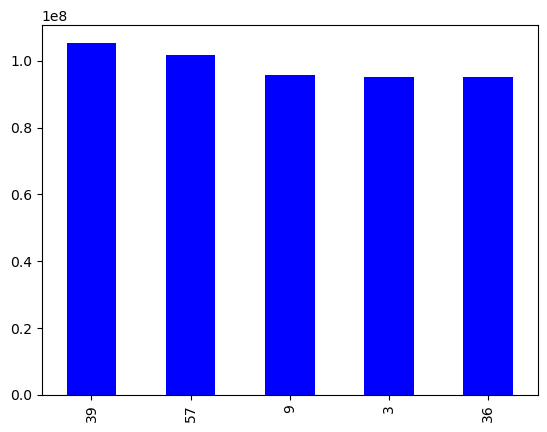

In [63]:
Yearly_Sales_Store_2010.Weekly_Sales.nlargest(5).plot.bar(color='b');

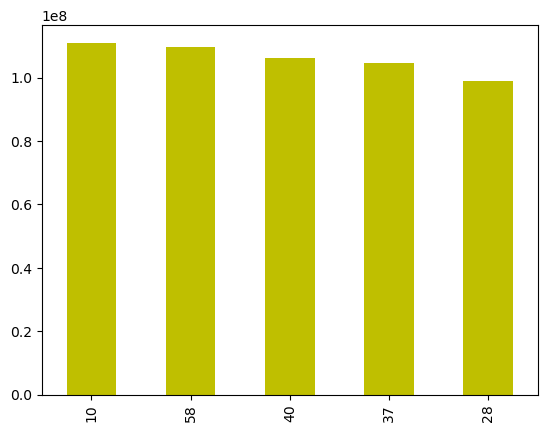

In [64]:
Yearly_Sales_Store_2011.Weekly_Sales.nlargest(5).plot.bar(color='y');

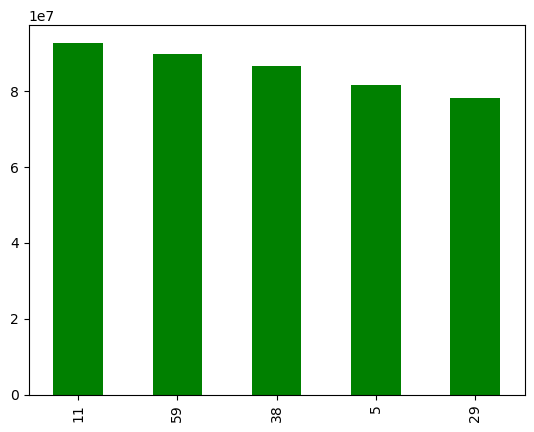

In [65]:
Yearly_Sales_Store_2012.Weekly_Sales.nlargest(5).plot.bar(color='g');

#### Temperature conversion  (F-32)*5/9 = celsius

In [66]:
data['Celsius']= [(Temp-32)*(5/9) for Temp in data.Temperature]

#### Lets create a new column called Heat

In [67]:
data['Heat']=pd.cut(x=data.Celsius,bins=[-20,10,35],labels=['Cold','Warm'])
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Months,Week_day,Weekday_Name,Celsius,Heat
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,may,6,sat,5.727778,Cold
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,dec,3,wed,3.616667,Cold
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,feb,4,thu,4.405556,Cold
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,feb,4,thu,8.127778,Cold
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,may,0,sun,8.055556,Cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,sep,4,thu,18.266667,Warm
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,may,3,wed,18.272222,Warm
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,dec,0,sun,12.483333,Warm
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,oct,4,thu,13.594444,Warm


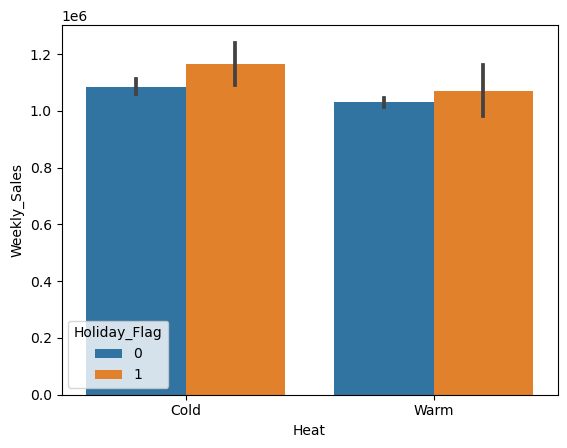

In [68]:
sns.barplot(x='Heat',y='Weekly_Sales',hue='Holiday_Flag',data=data)
plt.show()

#### Heat map

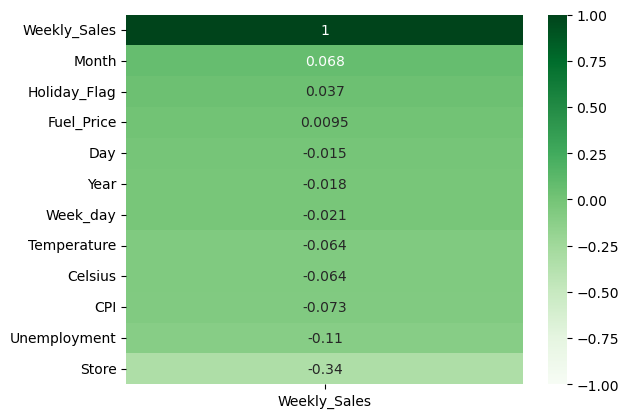

In [69]:
sns.heatmap(data.corr()[['Weekly_Sales']].sort_values(by='Weekly_Sales',ascending=False), vmin=-1, vmax=1, annot=True, cmap='Greens');

#### Plotting from pivot tables

In [73]:
Monthly_Sales=pd.pivot_table(data=data,values='Weekly_Sales',index='Months',columns='Year')
Monthly_Sales

Year,2010,2011,2012
Months,,,
apr,1.021177e+06,1.033220e+06,1.014127e+06
aug,1.025212e+06,1.044895e+06,1.064514e+06
dec,1.198413e+06,1.274311e+06,1.025078e+06
feb,1.064372e+06,1.042273e+06,1.057997e+06
jan,9.386639e+05,9.420697e+05,9.567817e+05
jul,1.023702e+06,9.976049e+05,1.025480e+06
jun,1.055082e+06,1.038471e+06,1.082920e+06
mar,1.034590e+06,1.011263e+06,1.025510e+06
may,1.039303e+06,1.015565e+06,1.053948e+06


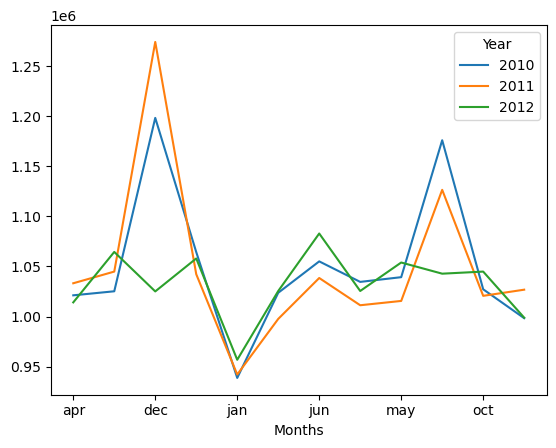

In [74]:
Monthly_Sales.plot();